---------- New Run ----------


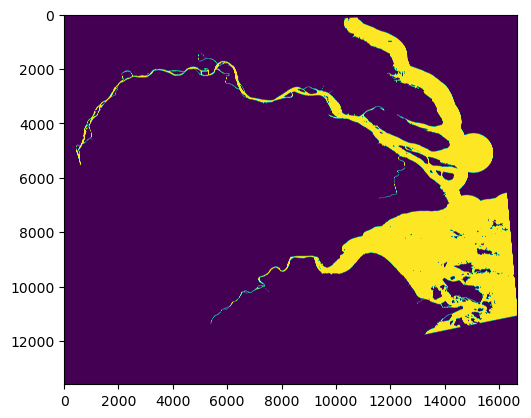

In [20]:
#实例化一个类：colville
from rivgraph.classes import delta
import matplotlib.pyplot as plt
from rivgraph import im_utils
import rivgraph
from rivgraph import ln_utils
import rasterio
from rasterio.transform import from_origin
import rivgraph.im_utils as im_utils
from rivgraph.classes import delta
import os
#定义一个保存tif文件的函数
def save_imask_as_tif(imask, filename, transform, crs='EPSG:4326'):
    """将二值Imask保存为GeoTIFF文件."""
    height, width = imask.shape
    with rasterio.open(
        filename,
        'w',
        driver='GTiff',
        height=height,
        width=width,
        count=1,
        dtype=rasterio.uint8,  # 使用uint8保存二进制图像
        crs=crs,
        transform=transform,
    ) as dst:
        dst.write(imask.astype(rasterio.uint8), 1)  # 强制转换为uint8并写入第一个波段
# 定义指向地理参考二值图像的路径。
mask_path = "./Estuary_changjiang (1).tif"

# 使用 rasterio 打开原始掩膜文件以提取地理信息
with rasterio.open(mask_path) as src:
    transform = src.transform
    crs = src.crs

# 结果将以该名称保存
name = 'CJK'

#将在此路径中创建一个的文件夹，用于存储输出
results_folder = './Results10.25'

# 创建结果文件夹（如果不存在）
os.makedirs(results_folder, exist_ok=True)

# 启动增量类!我们设置verbose=True来查看处理的进度
colville = delta(name, mask_path, results_folder=results_folder, verbose=True)

#移除mask中孤立的部分
colville.Imask = im_utils.largest_blobs(colville.Imask, nlargest=1, action='keep',connectivity=2)
# 保存处理后的图像
cleaned_filename = os.path.join(results_folder, 'cleaned_imask.tif')
save_imask_as_tif(colville.Imask, cleaned_filename, transform, crs)
#膨胀白色区域
#colville.Imask = im_utils.dilate(colville.Imask, n=1, strel='square')
# 保存膨胀后的图像dilated_filename = os.path.join(results_folder, 'dilated_imask2.tif')
#save_imask_as_tif(colville.Imask, dilated_filename, transform, crs)

#填充二值图像中指定大小的空洞
colville.Imask = im_utils.fill_holes(colville.Imask, maxholesize=200)
fill_filename = os.path.join(results_folder, 'fillhole_imask2.tif')
save_imask_as_tif(colville.Imask, fill_filename, transform, crs)


#mask_path = im_utils.largest_blobs(colville.Imask, nlargest=1, action='keep')
# The mask has been re-binarized and stored as an attribute of colville:
plt.imshow(colville.Imask)
#output_image_path = './Results822/largest_blob.png'
#plt.savefig(output_image_path, dpi=300, bbox_inches='tight')


Skeletonizing mask...
done skeletonization.
Geotiff written to Results10.25\CJK_skel.tif.


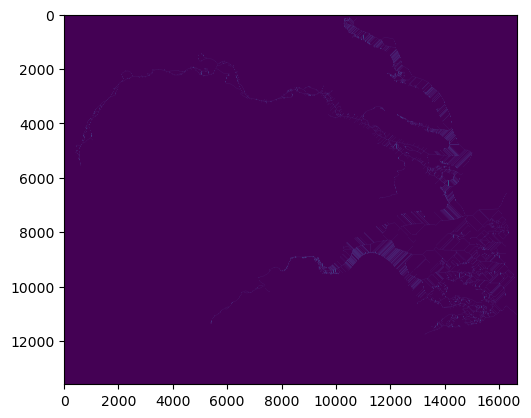

In [22]:
# Simply use the skeletonize() method.
colville.skeletonize()

# After running, colville has a new attribute: Iskel. Let's take a look.
plt.imshow(colville.Iskel)
# We use the write_geotiff() method with the "skeleton" option.
colville.to_geotiff('skeleton')

In [21]:
# Simply use the compute_network() method.
colville.compute_network()

Skeletonizing mask...
done skeletonization.
Resolving links and nodes...
links and nodes have been resolved.


In [23]:
# Now we can see that the "links" and "nodes" dictionaries have been added as colville attributes:
links = colville.links
nodes = colville.nodes
print('links: {}'.format(links.keys()))
print('nodes: {}'.format(nodes.keys()))

links: dict_keys(['idx', 'conn', 'id', 'n_networks'])
nodes: dict_keys(['idx', 'conn', 'id'])


In [33]:
colville.to_geovectors('network', ftype='json') # ftype can be either 'shp' or 'json'

# Let's see where the network geovector files were written:
print(colville.paths['links'])
print(colville.paths['nodes'])

Results10.25\CJK_links.json
Results10.25\CJK_nodes.json


In [26]:
#确定shoreline和源点，剪裁网络
colville.prune_network(path_shoreline='shoreline.shp', path_inletnodes='node.shp')

Not all inlets found in main connected component.


e:\anaconda\envs\rivgraph_env\lib\site-packages\rivgraph\ln_utils.py:1555: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  links_gpd['geometry'] = geoms
e:\anaconda\envs\rivgraph_env\lib\site-packages\rivgraph\classes.py:659: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  self.links, self.nodes = du.prune_delta(self.links, self.nodes, path_shoreline, path_inletnodes, self.gdobj, prune_less)


In [13]:
#对link和nodes进行修剪
ln_utils.remove_single_pixel_links(colville.links,colville.nodes)
ln_utils.remove_duplicate_links(colville.links,colville.nodes)

({'idx': [[93887963,
    93904636,
    93921309,
    93937982,
    93954655,
    93971328,
    93988001,
    94004674,
    94021347,
    94038021,
    94054695,
    94071369,
    94088043,
    94104717,
    94121391,
    94138065,
    94154738,
    94171412,
    94188086,
    94204760,
    94221434,
    94238107,
    94254781,
    94271455,
    94288129,
    94304803,
    94321478,
    94338152,
    94354827,
    94371501,
    94388175,
    94404849,
    94421523,
    94438198,
    94454872,
    94471546,
    94488220,
    94504893,
    94521567,
    94538240,
    94554914,
    94571587,
    94588262,
    94604936,
    94621610,
    94638284,
    94654957,
    94671631,
    94688305,
    94704979,
    94721653,
    94738328,
    94755002,
    94771676,
    94788350,
    94805024,
    94821699,
    94838374,
    94855048,
    94871722,
    94888396,
    94905071,
    94921745,
    94938419,
    94955093,
    94971767,
    94988442,
    95005117,
    95021791,
    95038465,
    95055139,

In [27]:
# 重新导出网络，shoreline和nodes同时更新
colville.to_geovectors()
# Note that this time we didn't specify the arguments; by default 'network' will be exported as type 'json'.

In [28]:
# 查看 links 中的键
print(colville.links.keys())

# 查看 nodes 中的键
print(colville.nodes.keys())

dict_keys(['idx', 'conn', 'id', 'n_networks', 'parallels', 'arts'])
dict_keys(['idx', 'conn', 'id', 'inlets', 'outlets', 'arts'])


Computing distance transform...
distance transform done.
Computing link widths and lengths...
link widths and lengths computed.


Text(0.5, 1.0, 'Histogram of link lengths')

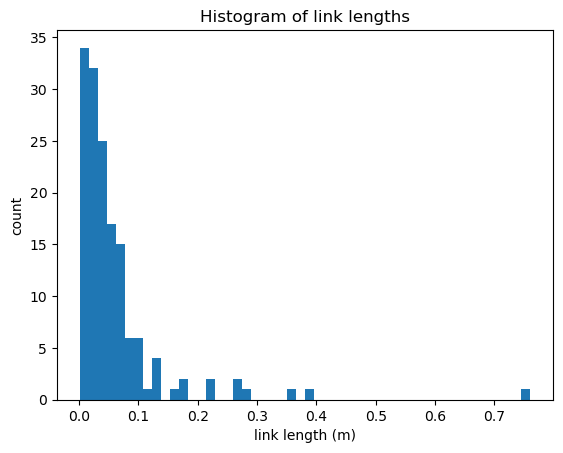

In [29]:
# 计算链路宽度和长度
colville.compute_link_width_and_length()

# 画出链接长度的直方图:
trash = plt.hist(colville.links['len_adj'], bins=50)
plt.ylabel('count')
plt.xlabel('link length (m)')
plt.title('Histogram of link lengths')

Text(0.5, 1.0, 'Histogram of link widths')

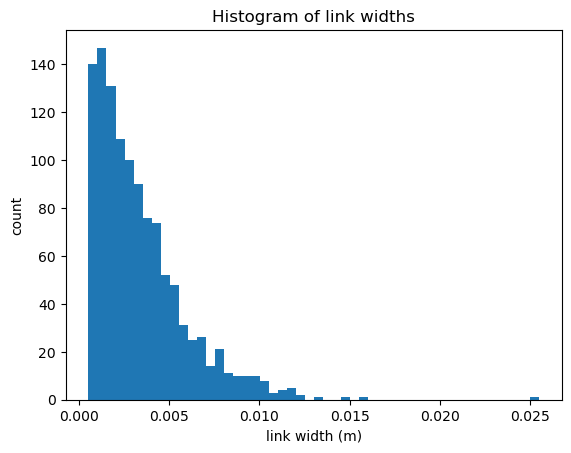

In [29]:
# 画出链接宽度的直方图:
trash = plt.hist(colville.links['wid_adj'], bins=50)
plt.ylabel('count')
plt.xlabel('link width (m)')
plt.title('Histogram of link widths')

In [30]:
#确定流向
colville.assign_flow_directions()

Using Results10.25\CJK_fixlinks.csv to manually set flow directions.


KeyError: 10425

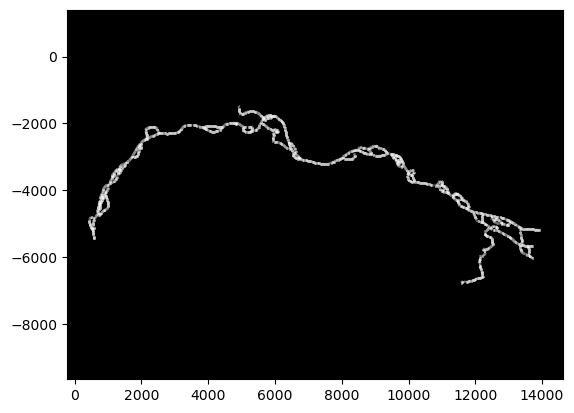

Geotiff written to Results10.25\CJK_link_directions.tif.


In [31]:
# Plot the links with the directionality marked
colville.plot('directions')
#将流向保存成tif
colville.to_geotiff('directions')

In [32]:
#保存一个包含方向信息的TIFF文件
colville.to_geotiff('directions')

Geotiff written to Results10.25\CJK_link_directions.tif.


In [104]:
# Unweighted, unnormalized adjacency matrix
adj = colville.adjacency_matrix()
print(adj)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
import pandas as pd
# 转换为 DataFrame
adj_df = pd.DataFrame(adj)

# 保存为 CSV 文件
adj_df.to_csv('./adjacency_matrix.csv', index=False, header=False)

In [105]:
# You may also want an adjacency matrix weighted by link width.
adj_w = colville.adjacency_matrix(weight='wid_adj') # Can also weight by 'len_adj' or provide a vector of your own weights.
print(adj_w)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00472079 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00264073 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
